# 天猫复购预测之挑战Baseline

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = "SimHei" #解决中文乱码问题
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

# 缺失值查看预处理

+ 读取训练数据，测试数据，用户信息数据

In [96]:
df_train = pd.read_csv('data_format1/train_format1.csv')
df_test = pd.read_csv('data_format1/test_format1.csv')
user_info = pd.read_csv('data_format1/user_info_format1.csv')

+ 读取用户行为数据

In [97]:
user_log = pd.read_csv('data_format1/user_log_format1.csv')

+ 打印测试数据、训练数据、用户信息数据、用户行为数据

In [98]:
print(df_test.shape,df_train.shape)
print(user_info.shape,user_log.shape)

(261477, 3) (260864, 3)
(424170, 3) (54925330, 7)


+ 打印用户信息

In [99]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [100]:
user_info.head(10)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0
5,272389,6.0,1.0
6,281071,4.0,0.0
7,139859,7.0,0.0
8,198411,5.0,1.0
9,67037,4.0,1.0


In [101]:
user_info['age_range'].replace(0.0,np.nan,inplace=True)
user_info['gender'].replace(2.0,np.nan,inplace=True)
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  329039 non-null  float64
 2   gender     407308 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


+ list['x'].replace(old,new,True) 当x是old时，用new替换old

In [102]:
user_info['age_range'].replace(np.nan,-1,inplace=True)
user_info['gender'].replace(np.nan,-1,inplace=True)

+ user_info[user_info['age_range'] == 1] 把'age_range'==1的数据罗列出来
+ user_info[user_info['age_range'] == 1]['age_range'] 把'age_range'==1的数据罗列出来，并且只显示id,age_range两列数据
+ user_info[user_info['age_range'] == -1]['age_range'].count() 把'age_range'==1的数据罗列出来，并且只显示id,age_range两列数据，这样的数据count条数

Text(0.5, 1.0, '用户年龄分布')

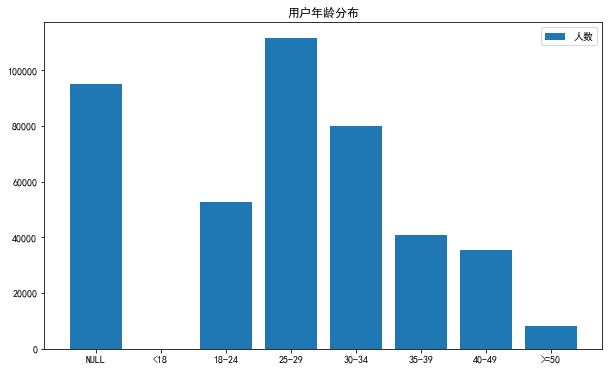

In [103]:
fig = plt.figure(figsize = (10, 6))
x = np.array(["NULL","<18","18-24","25-29","30-34","35-39","40-49",">=50"])
#<18岁为1；[18,24]为2； [25,29]为3； [30,34]为4；[35,39]为5；[40,49]为6； > = 50时为7和8
y = np.array([user_info[user_info['age_range'] == -1]['age_range'].count(),
             user_info[user_info['age_range'] == 1]['age_range'].count(),
             user_info[user_info['age_range'] == 2]['age_range'].count(),
             user_info[user_info['age_range'] == 3]['age_range'].count(),
             user_info[user_info['age_range'] == 4]['age_range'].count(),
             user_info[user_info['age_range'] == 5]['age_range'].count(),
             user_info[user_info['age_range'] == 6]['age_range'].count(),
             user_info[user_info['age_range'] == 7]['age_range'].count() + user_info[user_info['age_range'] == 8]['age_range'].count()])
plt.bar(x,y,label='人数')
plt.legend()
plt.title('用户年龄分布')

+ sns.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, 
              orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
作用是使用条形显示每个分箱器中的观察计数

Text(0.5, 1.0, '用户年龄分布')

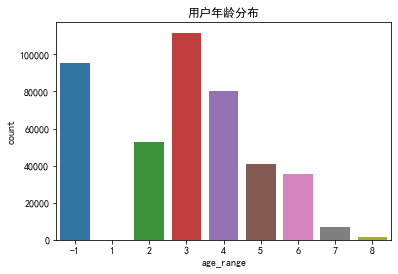

In [104]:
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8], data = user_info)
plt.title('用户年龄分布')

Text(0.5, 1.0, '用户性别分布')

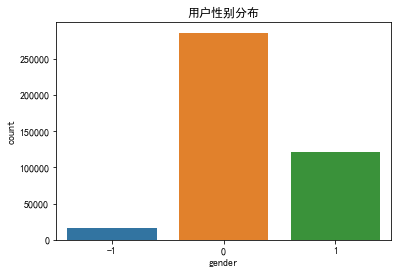

In [105]:
sns.countplot(x='gender',order = [-1,0,1],data = user_info)
plt.title('用户性别分布')

Text(0.5, 1.0, '用户性别年龄分布')

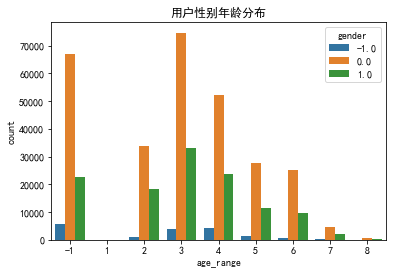

In [106]:
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8],hue= 'gender',data = user_info)
plt.title('用户性别年龄分布')

+ 年纪的缺省值不少，性别的缺省值倒是不多。
+ 用户年纪主要分布在18-34岁，且主要为女性。
+ 缺失值处理的话，先简单处理一下，把缺失值都做删除处理吧，后面继续尝试的话可以试试填充缺失值
+ 后来又注释掉了，没有删，因为这里是原始数据，应该在建立好特征之后再删吧

In [107]:
user_info['age_range'].replace(-1,np.nan,inplace=True)
user_info['gender'].replace(-1,np.nan,inplace=True)

In [108]:
#user_info = user_info.dropna()
#user_info.info()

Text(0.5, 1.0, '用户性别年龄分布')

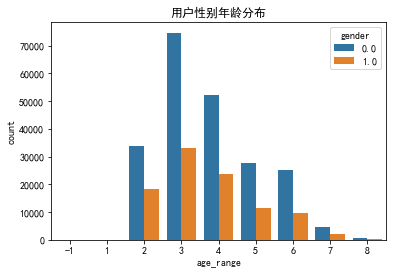

In [109]:
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8],hue= 'gender',data = user_info)
plt.title('用户性别年龄分布')

In [110]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


+ 得到的是每列中的缺失值数量

+ user_log.isnull().sum(axis=0) ，其中axis=0表示列，axis=1表示行

In [111]:
#user_log = user_log.dropna()
user_log.isnull().sum(axis=0)

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [112]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


+ 这里对于用户日志里的商品品牌的缺失也做了删除处理，反正也不多是不是
+ 没删，没删

# 初步可视化

+ user_log前面几行全是编码，购物者的唯一ID编码，商品的唯一编码，商品所属品类的唯一编码，商家的唯一ID编码，商品品牌的唯一编码
+ 后面是购买时间，与活动日志记录

In [113]:
df_train.head(10)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0
5,362112,2618,0
6,34944,2051,0
7,231552,3828,1
8,231552,2124,0
9,232320,1168,0


In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


+ bins为int或者sequence,默认为10，就是指定显示多少竖条

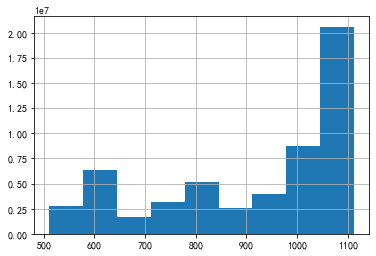

In [115]:
user_log['time_stamp'].hist(bins = 9)

+ 618和双十一购买的东西最多

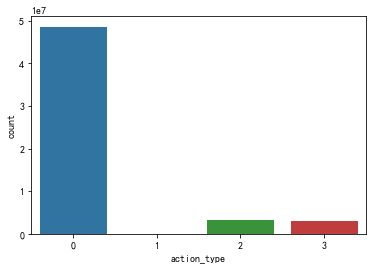

In [116]:
sns.countplot(x = 'action_type', order = [0,1,2,3],data = user_log)

+ 绝大多数都是单击，加入购物车的动作很少，比购买和收藏的动作还要少

# 特征工程

In [117]:
df_train[df_train['label'] == 1]

,user_id,merchant_id,label
2,34176,4356,1
7,231552,3828,1
53,306816,1489,1
57,176256,3323,1
59,307584,1340,1
...,...,...,...
260747,208511,2592,1
260793,87935,1964,1
260794,87935,3734,1
260799,350591,4394,1


In [118]:
user_log[(user_log['user_id'] == 34176) & (user_log['seller_id'] == 3906)]

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
35905644,34176,757713,821,3906,6268.0,1110,0
35905646,34176,757713,821,3906,6268.0,1110,0
35905672,34176,757713,821,3906,6268.0,1110,0
35905696,34176,718096,1142,3906,6268.0,1031,3
35905720,34176,757713,821,3906,6268.0,1031,3
35905791,34176,613698,821,3906,6268.0,1021,0
35905804,34176,757713,821,3906,6268.0,1108,0
35905824,34176,757713,821,3906,6268.0,1029,0
35905830,34176,1093165,1397,3906,6268.0,1027,0
35905831,34176,898580,662,3906,6268.0,1027,0


## 想要建立的特征
需要根据user_id，和merchant_id（seller_id）,从用户画像表以及用户日志表中提取特征，填写到df_train这个数据框中，从而训练评估模型
需要建立的特征如下：
+ 用户的年龄(age_range)
+ 用户的性别(gender)
+ 某用户在该商家日志的总条数(total_logs)
+ 用户浏览的商品的数目，就是浏览了多少个商品(unique_item_ids)
+ 浏览的商品的种类的数目，就是浏览了多少种商品(categories)
+ 用户浏览的天数(browse_days)
+ 用户单击的次数(one_clicks)
+ 用户添加购物车的次数(shopping_carts)
+ 用户购买的次数(purchase_times)
+ 用户收藏的次数(favourite_times)

In [119]:
df_train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [120]:
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [121]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


### age_range,gender特征添加

#### 参数如下：

+ left: 拼接的左侧DataFrame对象
+ right: 拼接的右侧DataFrame对象
+ on: 要加入的列或索引级别名称。 必须在左侧和右侧DataFrame对象中找到。 如果未传递且left_index和right_index为False，则DataFrame中的列的交集将被推断为连接键。
+ left_on:左侧DataFrame中的列或索引级别用作键。 可以是列名，索引级名称，也可以是长度等于DataFrame长度的数组。
+ right_on: 左侧DataFrame中的列或索引级别用作键。 可以是列名，索引级名称，也可以是长度等于DataFrame长度的数组。
+ left_index: 如果为True，则使用左侧DataFrame中的索引（行标签）作为其连接键。 对于具有MultiIndex（分层）的DataFrame，级别数必须与右侧DataFrame中的连接键数相匹配。
+ right_index: 与left_index功能相似。
+ how: One of ‘left’, ‘right’, ‘outer’, ‘inner’. 默认inner。inner是取交集，outer取并集。比如left：[‘A’,‘B’,‘C’];right[’'A,‘C’,‘D’]；inner取交集的话，left中出现的A会和right中出现的买一个A进行匹配拼接，如果没有是B，在right中没有匹配到，则会丢失。'outer’取并集，出现的A会进行一一匹配，没有同时出现的会将缺失的部分添加缺失值。
+ sort: 按字典顺序通过连接键对结果DataFrame进行排序。 默认为True，设置为False将在很多情况下显着提高性能。
+ suffixes: 用于重叠列的字符串后缀元组。 默认为（‘x’，’ y’）。
+ copy: 始终从传递的DataFrame对象复制数据（默认为True），即使不需要重建索引也是如此。
+ indicator:将一列添加到名为_merge的输出DataFrame，其中包含有关每行源的信息。 _merge是分类类型，并且对于其合并键仅出现在“左”DataFrame中的观察值，取得值为left_only，对于其合并键仅出现在“右”DataFrame中的观察值为right_only，并且如果在两者中都找到观察点的合并键，则为left_only。

In [122]:
# 以下merge相关于SQL中的select * from df_train t left join user_info u on t.user_id=u.user_id 
df_train = pd.merge(df_train,user_info,on="user_id",how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0,6.0,0.0
1,34176,121,0,6.0,0.0
2,34176,4356,1,6.0,0.0
3,34176,2217,0,6.0,0.0
4,230784,4818,0,NaN,0.0


### total_logs特征添加

+ pandas.groupby(A列,B列....).count():把每一列的值都返回出现的次数

+ pandas.groupby(A列,B列....).count().reset_index()[[A列,B列,C列]] 重置索引：没有索引的加上，有索引不对的重置

In [123]:
total_logs_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"]]).count().reset_index()[["user_id","seller_id","item_id"]]

In [124]:
total_logs_temp.head(10)

,user_id,seller_id,item_id
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1
5,1,2245,5
6,1,4026,5
7,1,4177,1
8,1,4335,1
9,2,420,26


+ pandas.rename(columns={旧列名:新列名,旧列名:新列名) : 列的title重命名

In [125]:
total_logs_temp.rename(columns={"seller_id":"merchant_id","item_id":"total_logs"},inplace=True)
total_logs_temp.head()

,user_id,merchant_id,total_logs
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1


In [126]:
df_train = pd.merge(df_train,total_logs_temp,on=["user_id","merchant_id"],how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs
0,34176,3906,0,6.0,0.0,39
1,34176,121,0,6.0,0.0,14
2,34176,4356,1,6.0,0.0,18
3,34176,2217,0,6.0,0.0,2
4,230784,4818,0,NaN,0.0,8


In [127]:
unique_item_ids_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["item_id"]]).count().reset_index()[["user_id","seller_id","item_id"]]

In [128]:
unique_item_ids_temp.head(10)

,user_id,seller_id,item_id
0,1,471,638653
1,1,739,556107
2,1,925,504149
3,1,1019,1110495
4,1,1156,896183
5,1,2245,181459
6,1,2245,452837
7,1,2245,543397
8,1,2245,779078
9,1,4026,112203


In [129]:
unique_item_ids_temp1 = unique_item_ids_temp.groupby([unique_item_ids_temp["user_id"],unique_item_ids_temp["seller_id"]]).count().reset_index()

In [130]:
unique_item_ids_temp1.head(10)

,user_id,seller_id,item_id
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,4
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,15


In [131]:
unique_item_ids_temp1.rename(columns={"seller_id":"merchant_id","item_id":"unique_item_ids"},inplace=True)

In [132]:
unique_item_ids_temp1.head(10)

,user_id,merchant_id,unique_item_ids
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,4
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,15


In [133]:
df_train = pd.merge(df_train,unique_item_ids_temp1,on=["user_id","merchant_id"],how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids
0,34176,3906,0,6.0,0.0,39,20
1,34176,121,0,6.0,0.0,14,1
2,34176,4356,1,6.0,0.0,18,2
3,34176,2217,0,6.0,0.0,2,1
4,230784,4818,0,NaN,0.0,8,1


### categories特征构建

In [134]:
categories_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["cat_id"]]).count().reset_index()[["user_id","seller_id","cat_id"]]

In [135]:
categories_temp.head(20)

,user_id,seller_id,cat_id
0,1,471,389
1,1,739,1252
2,1,925,1023
3,1,1019,992
4,1,1156,1256
5,1,2245,276
6,1,4026,1252
7,1,4177,1252
8,1,4335,389
9,2,420,602


In [136]:
categories_temp1 = categories_temp.groupby([categories_temp["user_id"],categories_temp["seller_id"]]).count().reset_index()
categories_temp1.head(10)

,user_id,seller_id,cat_id
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,2


In [137]:
categories_temp1.rename(columns={"seller_id":"merchant_id","cat_id":"categories"},inplace=True)
categories_temp1.head(10)

,user_id,merchant_id,categories
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,2


In [138]:
df_train = pd.merge(df_train,categories_temp1,on=["user_id","merchant_id"],how="left")

In [139]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories
0,34176,3906,0,6.0,0.0,39,20,6
1,34176,121,0,6.0,0.0,14,1,1
2,34176,4356,1,6.0,0.0,18,2,1
3,34176,2217,0,6.0,0.0,2,1,1
4,230784,4818,0,NaN,0.0,8,1,1
5,362112,2618,0,4.0,1.0,1,1,1
6,34944,2051,0,5.0,0.0,3,2,1
7,231552,3828,1,5.0,0.0,83,48,15
8,231552,2124,0,5.0,0.0,7,4,1
9,232320,1168,0,4.0,1.0,4,1,1


### browse_days特征构建

In [140]:
browse_days_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["time_stamp"]]).count().reset_index()[["user_id","seller_id","time_stamp"]]

In [141]:
browse_days_temp.head(10)

,user_id,seller_id,time_stamp
0,1,471,1111
1,1,739,1018
2,1,925,1011
3,1,1019,1111
4,1,1156,1111
5,1,2245,1009
6,1,4026,1018
7,1,4026,1021
8,1,4177,1018
9,1,4335,1111


In [142]:
browse_days_temp1 = browse_days_temp.groupby([browse_days_temp["user_id"],browse_days_temp["seller_id"]]).count().reset_index()
browse_days_temp1.head(10)

,user_id,seller_id,time_stamp
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [143]:
browse_days_temp1.rename(columns={"seller_id":"merchant_id","time_stamp":"browse_days"},inplace=True)
browse_days_temp1.head(10)

,user_id,merchant_id,browse_days
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [144]:
df_train = pd.merge(df_train,browse_days_temp1,on=["user_id","merchant_id"],how="left")

In [145]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days
0,34176,3906,0,6.0,0.0,39,20,6,9
1,34176,121,0,6.0,0.0,14,1,1,3
2,34176,4356,1,6.0,0.0,18,2,1,2
3,34176,2217,0,6.0,0.0,2,1,1,1
4,230784,4818,0,NaN,0.0,8,1,1,3
5,362112,2618,0,4.0,1.0,1,1,1,1
6,34944,2051,0,5.0,0.0,3,2,1,1
7,231552,3828,1,5.0,0.0,83,48,15,3
8,231552,2124,0,5.0,0.0,7,4,1,1
9,232320,1168,0,4.0,1.0,4,1,1,2


### one_clicks、shopping_carts、purchase_times、favourite_times特征构建

In [146]:
one_clicks_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["action_type"]]).count().reset_index()[["user_id","seller_id","action_type","item_id"]]

In [147]:
one_clicks_temp.head(10)

,user_id,seller_id,action_type,item_id
0,1,471,0,1
1,1,739,0,1
2,1,925,0,3
3,1,925,2,1
4,1,1019,0,10
5,1,1019,2,4
6,1,1156,0,1
7,1,2245,0,5
8,1,4026,0,4
9,1,4026,2,1


In [148]:
one_clicks_temp.rename(columns={"seller_id":"merchant_id","item_id":"times"},inplace=True)

In [149]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times
0,1,471,0,1
1,1,739,0,1
2,1,925,0,3
3,1,925,2,1
4,1,1019,0,10
5,1,1019,2,4
6,1,1156,0,1
7,1,2245,0,5
8,1,4026,0,4
9,1,4026,2,1


In [150]:
one_clicks_temp["one_clicks"] = one_clicks_temp["action_type"] == 0

In [151]:
one_clicks_temp["one_clicks"] = one_clicks_temp["one_clicks"] * one_clicks_temp["times"]

In [152]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks
0,1,471,0,1,1
1,1,739,0,1,1
2,1,925,0,3,3
3,1,925,2,1,0
4,1,1019,0,10,10
5,1,1019,2,4,0
6,1,1156,0,1,1
7,1,2245,0,5,5
8,1,4026,0,4,4
9,1,4026,2,1,0


In [153]:
one_clicks_temp["shopping_carts"] = one_clicks_temp["action_type"] == 1

In [154]:
one_clicks_temp["shopping_carts"] = one_clicks_temp["shopping_carts"] * one_clicks_temp["times"]

In [155]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts
0,1,471,0,1,1,0
1,1,739,0,1,1,0
2,1,925,0,3,3,0
3,1,925,2,1,0,0
4,1,1019,0,10,10,0
5,1,1019,2,4,0,0
6,1,1156,0,1,1,0
7,1,2245,0,5,5,0
8,1,4026,0,4,4,0
9,1,4026,2,1,0,0


In [156]:
one_clicks_temp["purchase_times"] = one_clicks_temp["action_type"] == 2

In [157]:
one_clicks_temp["purchase_times"] = one_clicks_temp["purchase_times"] * one_clicks_temp["times"]

In [158]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times
0,1,471,0,1,1,0,0
1,1,739,0,1,1,0,0
2,1,925,0,3,3,0,0
3,1,925,2,1,0,0,1
4,1,1019,0,10,10,0,0
5,1,1019,2,4,0,0,4
6,1,1156,0,1,1,0,0
7,1,2245,0,5,5,0,0
8,1,4026,0,4,4,0,0
9,1,4026,2,1,0,0,1


In [159]:
one_clicks_temp["favourite_times"] = one_clicks_temp["action_type"] == 3

In [160]:
one_clicks_temp["favourite_times"] = one_clicks_temp["favourite_times"] * one_clicks_temp["times"]

In [161]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,0,3,3,0,0,0
3,1,925,2,1,0,0,1,0
4,1,1019,0,10,10,0,0,0
5,1,1019,2,4,0,0,4,0
6,1,1156,0,1,1,0,0,0
7,1,2245,0,5,5,0,0,0
8,1,4026,0,4,4,0,0,0
9,1,4026,2,1,0,0,1,0


In [163]:
four_features = one_clicks_temp.groupby([one_clicks_temp["user_id"],one_clicks_temp["merchant_id"]]).sum().reset_index()

In [164]:
four_features.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,2,4,3,0,1,0
3,1,1019,2,14,10,0,4,0
4,1,1156,0,1,1,0,0,0
5,1,2245,0,5,5,0,0,0
6,1,4026,2,5,4,0,1,0
7,1,4177,0,1,1,0,0,0
8,1,4335,0,1,1,0,0,0
9,2,420,2,26,23,0,3,0


+ df.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

+ 删除集合中的整行或整列

+ labels：指示标签，表示行标或列标；
+ axis = 0：默认取 0，表示删除集合的行；
+ axis = 1：删除集合中的列；
+ index：删除行；
+ columns：删除列；
+ level：针对有两级行标或列标的集合；如下图，集合有两级行标；
+ level = 1：表示按第2级行删除整行；（即speed、weight、length）
+ level = 0：默认取 0，表示按第1级行标删除整行；（即speed、cow、falcon，此处一次删除 3 行数据）

In [165]:
four_features = four_features.drop(["action_type","times"], axis=1)

In [166]:
df_train = pd.merge(df_train,four_features,on=["user_id","merchant_id"],how="left")

In [167]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,34176,3906,0,6.0,0.0,39,20,6,9,36,0,1,2
1,34176,121,0,6.0,0.0,14,1,1,3,13,0,1,0
2,34176,4356,1,6.0,0.0,18,2,1,2,12,0,6,0
3,34176,2217,0,6.0,0.0,2,1,1,1,1,0,1,0
4,230784,4818,0,NaN,0.0,8,1,1,3,7,0,1,0
5,362112,2618,0,4.0,1.0,1,1,1,1,0,0,1,0
6,34944,2051,0,5.0,0.0,3,2,1,1,2,0,1,0
7,231552,3828,1,5.0,0.0,83,48,15,3,78,0,5,0
8,231552,2124,0,5.0,0.0,7,4,1,1,6,0,1,0
9,232320,1168,0,4.0,1.0,4,1,1,2,2,0,1,1


## 建立好的特征的缺失值处理

In [168]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260864 entries, 0 to 260863
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          260864 non-null  int64  
 1   merchant_id      260864 non-null  int64  
 2   label            260864 non-null  int64  
 3   age_range        203802 non-null  float64
 4   gender           250170 non-null  float64
 5   total_logs       260864 non-null  int64  
 6   unique_item_ids  260864 non-null  int64  
 7   categories       260864 non-null  int64  
 8   browse_days      260864 non-null  int64  
 9   one_clicks       260864 non-null  int64  
 10  shopping_carts   260864 non-null  int64  
 11  purchase_times   260864 non-null  int64  
 12  favourite_times  260864 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 27.9 MB


In [169]:
df_train.isnull().sum(axis=0)

user_id                0
merchant_id            0
label                  0
age_range          57062
gender             10694
total_logs             0
unique_item_ids        0
categories             0
browse_days            0
one_clicks             0
shopping_carts         0
purchase_times         0
favourite_times        0
dtype: int64

+ df.fillna()函数，参数method取值ffill

+ method：插值方式，默认为’ffill’，向前填充，或是向下填充
+ 而‘bfill’：向后填充，或是向上填充

In [170]:
df_train = df_train.fillna(method='ffill')
# 缺失值向前填充

In [171]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260864 entries, 0 to 260863
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          260864 non-null  int64  
 1   merchant_id      260864 non-null  int64  
 2   label            260864 non-null  int64  
 3   age_range        260864 non-null  float64
 4   gender           260864 non-null  float64
 5   total_logs       260864 non-null  int64  
 6   unique_item_ids  260864 non-null  int64  
 7   categories       260864 non-null  int64  
 8   browse_days      260864 non-null  int64  
 9   one_clicks       260864 non-null  int64  
 10  shopping_carts   260864 non-null  int64  
 11  purchase_times   260864 non-null  int64  
 12  favourite_times  260864 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 27.9 MB


## 特征可视化

Text(0.5, 1.0, '训练集用户性别年龄分布')

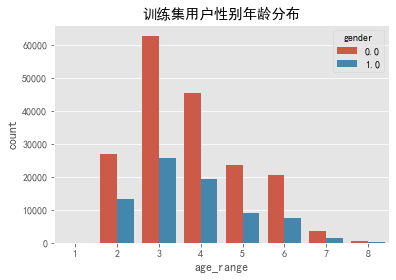

In [172]:
plt.style.use('ggplot')
sns.countplot(x = 'age_range', order = [1,2,3,4,5,6,7,8],hue= 'gender',data = df_train)
plt.title('训练集用户性别年龄分布')

+ 调色盘 : 对图表整体颜色、比例进行风格设置，包括颜色色板等,调用系统风格进行数据可视化

+ color_palette()
+ 默认6种颜色：deep,muted, pastel, bright, dark, colorblind
+ seaborn, color_palette(palette=None, n_colors = None, desat = None)

['user_id', 'merchant_id', 'label', 'age_range', 'gender', 'total_logs', 'unique_item_ids', 'categories', 'browse_days', 'one_clicks', 'shopping_carts', 'purchase_times', 'favourite_times']


Text(0, 0.5, '用户数')

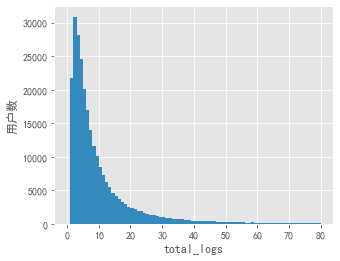

In [173]:
colnm = df_train.columns.tolist()
print(colnm)
plt.figure(figsize = (5, 4))
color = sns.color_palette()

df_train[colnm[5]].hist(range=[0,80],bins = 80,color = color[1])
plt.xlabel(colnm[5],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

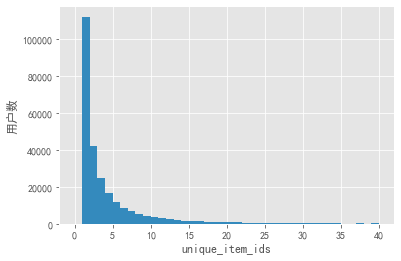

In [174]:
df_train[colnm[6]].hist(range=[0,40],bins = 40,color = color[1])
plt.xlabel(colnm[6],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

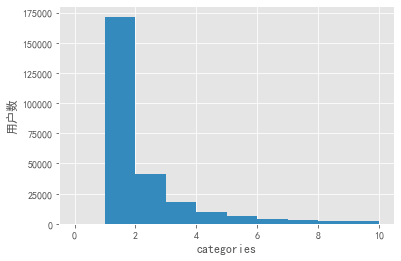

In [175]:
df_train[colnm[7]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[7],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

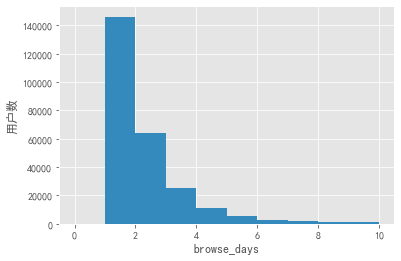

In [176]:
df_train[colnm[8]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[8],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户单击次数统计')

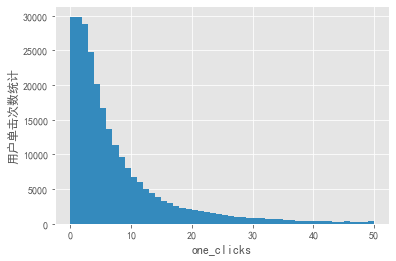

In [177]:
df_train[colnm[9]].hist(range=[0,50],bins = 50,color = color[1])
plt.xlabel(colnm[9],fontsize = 12)
plt.ylabel('用户单击次数统计')

Text(0, 0.5, '用户数')

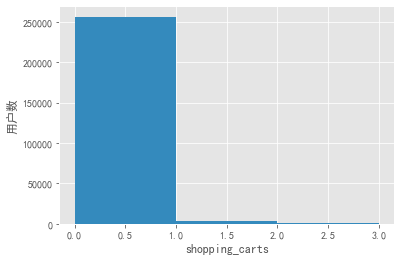

In [178]:
df_train[colnm[10]].hist(range=[0,3],bins = 3,color = color[1])
plt.xlabel(colnm[10],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

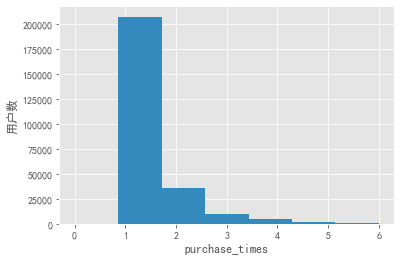

In [179]:
df_train[colnm[11]].hist(range=[0,6],bins = 7,color = color[1])
plt.xlabel(colnm[11],fontsize = 12)
plt.ylabel("用户数")

Text(0, 0.5, '用户数')

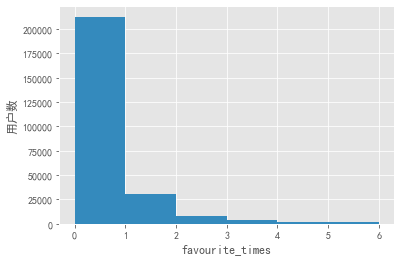

In [180]:
df_train[colnm[12]].hist(range=[0,6],bins = 6,color = color[1])
plt.xlabel(colnm[12],fontsize = 12)
plt.ylabel("用户数")

+ seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)¶


+ 这里的data，如果接收的是干干净净的numpy二维数组的话，可以看到行标就是0,1,2，如果是DataFrame，就可以用列名来标记了

+ annot: 默认为False，为True的话，会在格子上显示数字

+ vmax, vmin: 热力图颜色取值的最大值，最小值，默认会从data中推导

参数：
+ data：矩形数据集

+ 可以强制转换为ndarray格式数据的2维数据集。如果提供了Pandas DataFrame数据，索引/列信息将用于标记列和行。

+ vmin, vmax：浮点型数据，可选参数。

+ 用于锚定色彩映射的值，否则它们是从数据和其他关键字参数推断出来的。

+ cmap：matplotlib 颜色条名称或者对象，或者是颜色列表，可选参数。

+ 从数据值到颜色空间的映射。 如果没有提供，默认值将取决于是否设置了“center”。

+ center：浮点数，可选参数。

+ 绘制有色数据时将色彩映射居中的值。 如果没有指定，则使用此参数将更改默认的cmap。

+ robust：布尔值，可选参数。

+ 如果是True，并且vmin或vmax为空，则使用稳健分位数而不是极值来计算色彩映射范围。

+ annot:布尔值或者矩形数据，可选参数。

+ 如果为True，则在每个热力图单元格中写入数据值。 如果数组的形状与data相同，则使用它来代替原始数据注释热力图。

+ fmt：字符串，可选参数。

+ 添加注释时要使用的字符串格式代码。

+ annot_kws：字典或者键值对，可选参数。

+ 当annot为True时，ax.text的关键字参数。

+ linewidths：浮点数，可选参数。

+ 划分每个单元格的行的宽度。

+ linecolor：颜色，可选参数

+ 划分每个单元的线条的颜色。

+ cbar：布尔值，可选参数。

+ 描述是否绘制颜色条。

+ cbar_kws：字典或者键值对，可选参数。

+ fig.colorbar的关键字参数。

+ cbar_ax：matplotlib Axes，可选参数。

+ 用于绘制颜色条的轴，否则从主轴获取。

+ square：布尔值，可选参数。

+ 如果为True，则将坐标轴方向设置为“equal”，以使每个单元格为方形。

+ xticklabels, yticklabels：“auto”，布尔值，类列表值，或者整形数值，可选参数。

+ 如果为True，则绘制数据框的列名称。如果为False，则不绘制列名称。如果是列表，则将这些替代标签绘制为xticklabels。如果是整数，则使用列名称，但仅绘制每个n标签。如果是“auto”，将尝试密集绘制不重叠的标签。

+ mask：布尔数组或者DataFrame数据，可选参数。

+ 如果为空值，数据将不会显示在mask为True的单元格中。 具有缺失值的单元格将自动被屏蔽。

+ ax：matplotlib Axes，可选参数。

+ 绘制图的坐标轴，否则使用当前活动的坐标轴。

+ kwargs：其他关键字参数。

+ 所有其他关键字参数都传递给ax.pcolormesh。

+ 返回值：ax：matplotlib Axes

+ 热力图的轴对象。

+ pd.corr():相关系数矩阵,即给出各列之间的相关系数

+ seaborn.diverging_palette(h_neg, h_pos, s=75, l=50, sep=10, n=6, center='light', as_cmap=False)

+ 在两个 HUSL 颜色直接建立一个发散调色板

                    label  age_range    gender  total_logs  unique_item_ids  \
label            1.000000   0.018152 -0.018792    0.081418         0.099158   
age_range        0.018152   1.000000 -0.027883    0.011201         0.017812   
gender          -0.018792  -0.027883  1.000000   -0.039862        -0.060400   
total_logs       0.081418   0.011201 -0.039862    1.000000         0.797139   
unique_item_ids  0.099158   0.017812 -0.060400    0.797139         1.000000   
categories       0.102606  -0.001180 -0.064128    0.587041         0.752132   
browse_days      0.078193   0.013111 -0.059773    0.544299         0.570277   
one_clicks       0.077081   0.011877 -0.035905    0.996763         0.783888   
shopping_carts  -0.003404   0.002912  0.018400    0.059823         0.049075   
purchase_times   0.084347   0.030647 -0.039949    0.285293         0.306341   
favourite_times  0.052391  -0.021751 -0.053423    0.413022         0.423914   

                 categories  browse_days  one_click

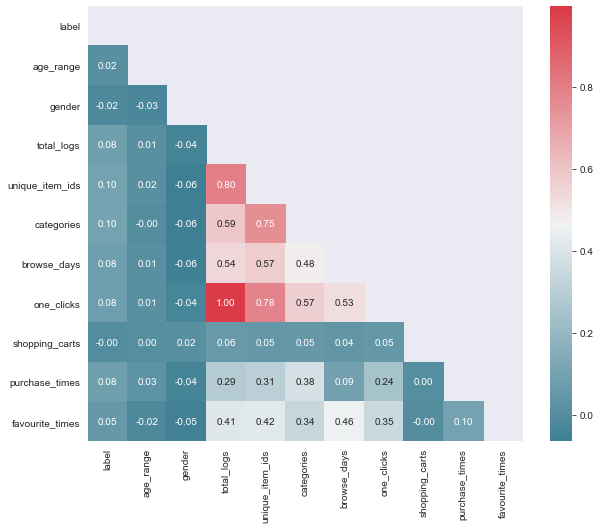

In [181]:
sns.set_style("dark")

plt.figure(figsize = (10,8))
colnm = df_train.columns.tolist()[2:13]
mcorr = df_train[colnm].corr()
print(mcorr)
# np.zero_like的意思就是生成一个和你所给数组a相同shape的全0数组。
mask = np.zeros_like(mcorr, dtype=np.bool)
print(mask)
# np.triu_indices_from()返回方阵的上三角矩阵的索引
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True,fmt='0.2f')
# 相关性好像不大，可是日志里确实也没啥可以用的其他特征了啊

# 模型构建与调参

### 逻辑斯特模型

In [182]:
Y = df_train['label']
X = df_train.drop(['user_id','merchant_id','label'],axis = 1)
X.head(10)

,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,6.0,0.0,39,20,6,9,36,0,1,2
1,6.0,0.0,14,1,1,3,13,0,1,0
2,6.0,0.0,18,2,1,2,12,0,6,0
3,6.0,0.0,2,1,1,1,1,0,1,0
4,6.0,0.0,8,1,1,3,7,0,1,0
5,4.0,1.0,1,1,1,1,0,0,1,0
6,5.0,0.0,3,2,1,1,2,0,1,0
7,5.0,0.0,83,48,15,3,78,0,5,0
8,5.0,0.0,7,4,1,1,6,0,1,0
9,4.0,1.0,4,1,1,2,2,0,1,1


In [194]:
Y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state = 10)

In [196]:
Logit = LogisticRegression(solver='liblinear')
Logit.fit(X_train, y_train)
Predict = Logit.predict(X_test)
Predict_proba = Logit.predict_proba(X_test)
print(Predict[0:20])
print(Predict_proba[:])
Score = accuracy_score(y_test, Predict)
Score
# 一般的准确率验证方法

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.79596456 0.20403544]
 [0.95828116 0.04171884]
 [0.95192758 0.04807242]
 ...
 [0.9405193  0.0594807 ]
 [0.95677734 0.04322266]
 [0.93242875 0.06757125]]


0.9382053483807654

In [197]:
print("lr.coef_: {}".format(Logit.coef_))
print("lr.intercept_: {}".format(Logit.intercept_))
# 截距与斜率

lr.coef_: [[ 0.04942982 -0.09897809  0.01360691  0.01184835  0.07017631  0.06282488
  -0.01775603 -0.13624645  0.17884733 -0.01123794]]
lr.intercept_: [-3.47137369]


In [198]:
#初始化逻辑回归算法
LogRegAlg=LogisticRegression(random_state=1,solver='liblinear')
re = LogRegAlg.fit(X,Y)
#使用sklearn库里面的交叉验证函数获取预测准确率分数
scores = model_selection.cross_val_score(LogRegAlg,X,Y,cv=3)
#使用交叉验证分数的平均值作为最终的准确率
print("准确率为: ",scores.mean())

准确率为:  0.9386998592077297


### K近邻模型

In [199]:
# 模型实例化，并将邻居个数设为3 
reg = KNeighborsRegressor(n_neighbors=1000)
# 利用训练数据和训练目标值来拟合模型 
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.01


“这一算法对于有很多特 征（几百或更多）的数据集往往效果不好，对于大多数特征的大多数取值都为 0 的数据集 （所谓的稀疏数据集）来说，这一算法的效果尤其不好”我的数据里面零很多，果然预测效果很不好，和闹着玩似的

### 决策树

In [200]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4,random_state=0) 
tree.fit(X_train, y_train)
Predict_proba = tree.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

[[0.89760368 0.10239632]
 [0.95837129 0.04162871]
 [0.95837129 0.04162871]
 ...
 [0.91089364 0.08910636]
 [0.95837129 0.04162871]
 [0.93376113 0.06623887]]
Accuracy on training set: 0.939
Accuracy on test set: 0.938


In [201]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["0","1"], feature_names=X.columns.tolist(), impurity=False, filled=True)
# 我们可以利用 tree 模块的 export_graphviz 函数来将树可视化。这个函数会生成一 个 .dot 格式的文件，这是一种用于保存图形的文本文件格式。
# 设置为结点添加颜色 的选项，颜色表示每个结点中的多数类别，同时传入类别名称和特征名称，这样可以对 树正确标记

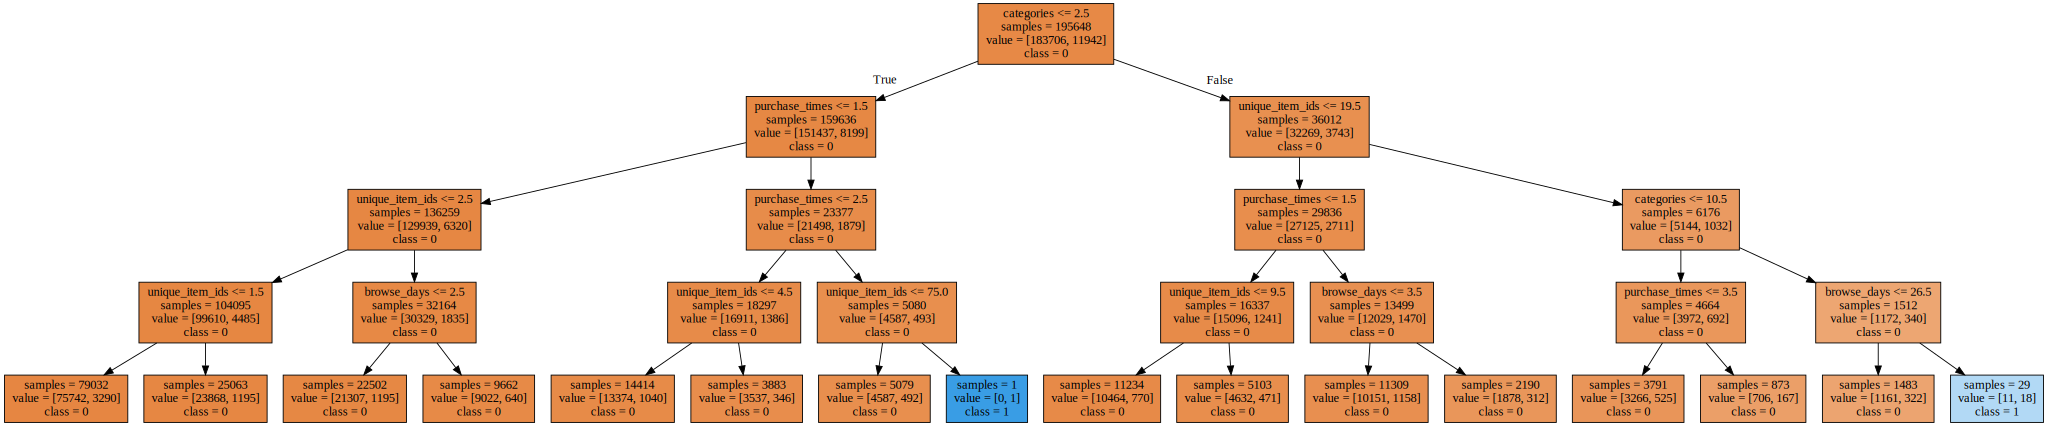

In [202]:
import graphviz
with open("tree.dot") as f: 
    dot_graph = f.read() 
graphviz.Source(dot_graph)

In [203]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.22828078 0.51584599 0.05130975
 0.         0.         0.20456347 0.        ]


<BarContainer object of 10 artists>

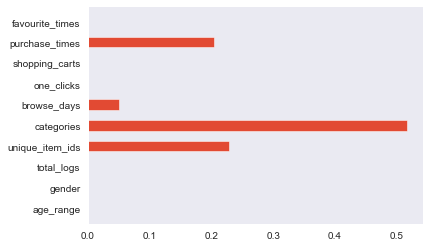

In [204]:
plt.barh(X.columns.tolist(),height=0.5,width=tree.feature_importances_,align="center")

### 随机森林

In [205]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=2) 
forest.fit(X_train, y_train)
Predict_proba = forest.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

[[0.8        0.2       ]
 [0.95573603 0.04426397]
 [0.95407861 0.04592139]
 ...
 [1.         0.        ]
 [0.95003622 0.04996378]
 [1.         0.        ]]
Accuracy on training set: 0.959
Accuracy on test set: 0.933


<BarContainer object of 10 artists>

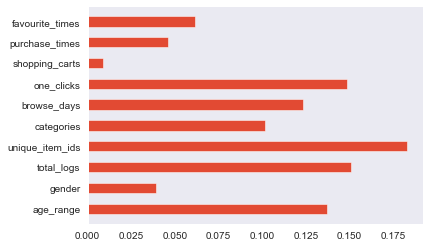

In [206]:
plt.barh(X.columns.tolist(),height=0.5,width=forest.feature_importances_,align="center")

### 梯度提升回归树

In [207]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0) 
gbrt.fit(X_train, y_train)
Predict_proba = gbrt.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

[[0.87042249 0.12957751]
 [0.957535   0.042465  ]
 [0.9548853  0.0451147 ]
 ...
 [0.91902328 0.08097672]
 [0.96209947 0.03790053]
 [0.91587013 0.08412987]]
Accuracy on training set: 0.939
Accuracy on test set: 0.938


<BarContainer object of 10 artists>

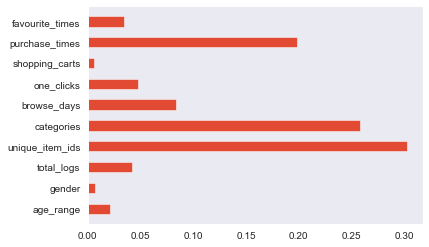

In [208]:
plt.barh(X.columns.tolist(),height=0.5,width=gbrt.feature_importances_,align="center")

### 多层感知机

In [210]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', activation='relu',alpha=0.1,random_state=0,hidden_layer_sizes=[10,10]).fit(X_train, y_train)
Predict = mlp.predict(X_test)
Predict_proba = mlp.predict_proba(X_test)
print(Predict_proba[:])
Score = accuracy_score(y_test, Predict)
print(Score)

[[0.81205129 0.18794871]
 [0.94679802 0.05320198]
 [0.94502392 0.05497608]
 ...
 [0.93215108 0.06784892]
 [0.95665198 0.04334802]
 [0.88990682 0.11009318]]
0.9383280176643768


c:\users\zhangyanqing\.conda\envs\tf2.0\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


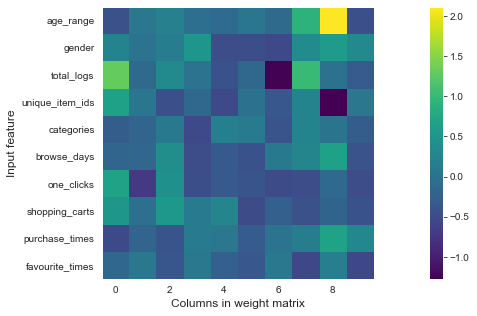

In [211]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(10), X.columns.tolist()) 
plt.xlabel("Columns in weight matrix") 
plt.ylabel("Input feature") 
plt.colorbar()
# 显示了连接输入和第一个隐层之间的权重。图中的行对应 10个输入特征，列对应 10个隐单元。

In [212]:
# 原始数据预处理之缩放
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [213]:
X_train = X_train[X_train.columns.tolist()].astype(float)
X_test = X_test[X_test.columns.tolist()].astype(float)

In [214]:
scaler.fit(X_train)

StandardScaler()

In [215]:
# 变换数据
X_train_scaled = scaler.transform(X_train)

In [216]:
X_test_scaled = scaler.transform(X_test)

In [217]:
mlp1 = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10]).fit(X_train_scaled, y_train)
Predict = mlp1.predict(X_test)
Score = accuracy_score(y_test, Predict)
print(Score)

0.9381286800785084


缩放之后的结果也没啥大不了的

# 实践预测

In [218]:
df_test.head()

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN


## 特征构建

In [219]:
df_test = pd.merge(df_test,user_info,on="user_id",how="left")

In [220]:
df_test = pd.merge(df_test,total_logs_temp,on=["user_id","merchant_id"],how="left")

In [221]:
df_test = pd.merge(df_test,unique_item_ids_temp1,on=["user_id","merchant_id"],how="left")

In [222]:
df_test = pd.merge(df_test,categories_temp1,on=["user_id","merchant_id"],how="left")

In [223]:
df_test = pd.merge(df_test,browse_days_temp1,on=["user_id","merchant_id"],how="left")

In [224]:
df_test = pd.merge(df_test,four_features,on=["user_id","merchant_id"],how="left")

In [225]:
df_test = df_test.fillna(method='bfill')
df_test = df_test.fillna(method='ffill')
# 缺失值向后填充

In [226]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,0,1,0
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,0,5,0
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,0,1,0
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,0,1,0
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,0,1,2
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,0,1,1
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,0,2,0
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,0,1,0
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,0,1,0


In [227]:
df_test.isnull().sum(axis=0)

user_id                 0
merchant_id             0
prob               261477
age_range               0
gender                  0
total_logs              0
unique_item_ids         0
categories              0
browse_days             0
one_clicks              0
shopping_carts          0
purchase_times          0
favourite_times         0
dtype: int64

## 模型预测

In [228]:
X1 = df_test.drop(['user_id','merchant_id','prob'],axis = 1)

In [229]:
X1.head(10)

,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,2.0,0.0,2,1,1,1,1,0,1,0
1,2.0,0.0,10,9,4,1,5,0,5,0
2,6.0,0.0,6,1,1,1,5,0,1,0
3,6.0,0.0,11,1,1,1,10,0,1,0
4,2.0,1.0,50,8,4,5,47,0,1,2
5,2.0,0.0,11,2,1,4,9,0,1,1
6,5.0,1.0,13,6,1,1,11,0,2,0
7,3.0,1.0,2,1,1,1,1,0,1,0
8,3.0,1.0,3,2,1,1,2,0,1,0
9,3.0,1.0,7,4,3,1,6,0,1,0


### 逻辑斯特模型

In [231]:
Predict_proba = Logit.predict_proba(X1)

In [232]:
df_test["Logit_prob"] = Predict_proba[:,1]

In [233]:
Predict_proba[0:10]

array([[0.95432091, 0.04567909],
       [0.87876888, 0.12123112],
       [0.94574288, 0.05425712],
       [0.94679761, 0.05320239],
       [0.9415685 , 0.0584315 ],
       [0.94633626, 0.05366374],
       [0.94157682, 0.05842318],
       [0.95643287, 0.04356713],
       [0.95611092, 0.04388908],
       [0.94949009, 0.05050991]])

In [234]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times,Logit_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,0,1,0,0.045679
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,0,5,0,0.121231
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,0,1,0,0.054257
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,0,1,0,0.053202
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,0,1,2,0.058432
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,0,1,1,0.053664
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,0,2,0,0.058423
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0,0.043567
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,0,1,0,0.043889
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,0,1,0,0.050510


### 决策树

In [235]:
Predict_proba = tree.predict_proba(X1)

In [236]:
df_test["Tree_prob"] = Predict_proba[:,1]

In [237]:
Predict_proba[0:10]

array([[0.95837129, 0.04162871],
       [0.89760368, 0.10239632],
       [0.95837129, 0.04162871],
       [0.95837129, 0.04162871],
       [0.93145807, 0.06854193],
       [0.95232015, 0.04767985],
       [0.91089364, 0.08910636],
       [0.95837129, 0.04162871],
       [0.95232015, 0.04767985],
       [0.93145807, 0.06854193]])

In [238]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times,Logit_prob,Tree_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,0,1,0,0.045679,0.041629
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,0,5,0,0.121231,0.102396
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,0,1,0,0.054257,0.041629
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,0,1,0,0.053202,0.041629
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,0,1,2,0.058432,0.068542
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,0,1,1,0.053664,0.047680
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,0,2,0,0.058423,0.089106
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0,0.043567,0.041629
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,0,1,0,0.043889,0.047680
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,0,1,0,0.050510,0.068542


### 随机森林

In [239]:
Predict_proba = forest.predict_proba(X1)

In [240]:
df_test["Forest_prob"] = Predict_proba[:,1]

In [241]:
Predict_proba[0:10]

array([[0.96719674, 0.03280326],
       [1.        , 0.        ],
       [0.98963009, 0.01036991],
       [1.        , 0.        ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.96004151, 0.03995849],
       [0.95346438, 0.04653562],
       [1.        , 0.        ]])

In [242]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times,Logit_prob,Tree_prob,Forest_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,0,1,0,0.045679,0.041629,0.032803
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,0,5,0,0.121231,0.102396,0.000000
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,0,1,0,0.054257,0.041629,0.010370
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,0,1,0,0.053202,0.041629,0.000000
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,0,1,2,0.058432,0.068542,0.100000
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,0,1,1,0.053664,0.047680,0.000000
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,0,2,0,0.058423,0.089106,0.000000
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0,0.043567,0.041629,0.039958
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,0,1,0,0.043889,0.047680,0.046536
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,0,1,0,0.050510,0.068542,0.000000


### 梯度提升回归树

In [243]:
Predict_proba = gbrt.predict_proba(X1)

In [244]:
df_test["Gbrt_prob"] = Predict_proba[:,1]

In [245]:
Predict_proba[0:10]

array([[0.96338469, 0.03661531],
       [0.89053731, 0.10946269],
       [0.95615727, 0.04384273],
       [0.95615727, 0.04384273],
       [0.92325522, 0.07674478],
       [0.95456509, 0.04543491],
       [0.92597124, 0.07402876],
       [0.96209947, 0.03790053],
       [0.95641878, 0.04358122],
       [0.94607038, 0.05392962]])

In [246]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times,Logit_prob,Tree_prob,Forest_prob,Gbrt_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,0,1,0,0.045679,0.041629,0.032803,0.036615
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,0,5,0,0.121231,0.102396,0.000000,0.109463
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,0,1,0,0.054257,0.041629,0.010370,0.043843
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,0,1,0,0.053202,0.041629,0.000000,0.043843
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,0,1,2,0.058432,0.068542,0.100000,0.076745
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,0,1,1,0.053664,0.047680,0.000000,0.045435
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,0,2,0,0.058423,0.089106,0.000000,0.074029
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0,0.043567,0.041629,0.039958,0.037901
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,0,1,0,0.043889,0.047680,0.046536,0.043581
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,0,1,0,0.050510,0.068542,0.000000,0.053930


### 多层感知机

In [247]:
Predict_proba = mlp.predict_proba(X1)

In [248]:
df_test["mlp_prob"] = Predict_proba[:,1]

In [249]:
Predict_proba[0:10]

array([[0.9562416 , 0.0437584 ],
       [0.90080341, 0.09919659],
       [0.94683645, 0.05316355],
       [0.94657849, 0.05342151],
       [0.93481535, 0.06518465],
       [0.95421371, 0.04578629],
       [0.92474261, 0.07525739],
       [0.95699893, 0.04300107],
       [0.95411622, 0.04588378],
       [0.94307154, 0.05692846]])

In [250]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times,Logit_prob,Tree_prob,Forest_prob,Gbrt_prob,mlp_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,0,1,0,0.045679,0.041629,0.032803,0.036615,0.043758
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,0,5,0,0.121231,0.102396,0.000000,0.109463,0.099197
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,0,1,0,0.054257,0.041629,0.010370,0.043843,0.053164
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,0,1,0,0.053202,0.041629,0.000000,0.043843,0.053422
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,0,1,2,0.058432,0.068542,0.100000,0.076745,0.065185
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,0,1,1,0.053664,0.047680,0.000000,0.045435,0.045786
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,0,2,0,0.058423,0.089106,0.000000,0.074029,0.075257
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0,0.043567,0.041629,0.039958,0.037901,0.043001
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,0,1,0,0.043889,0.047680,0.046536,0.043581,0.045884
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,0,1,0,0.050510,0.068542,0.000000,0.053930,0.056928


## 结果保存

In [251]:
choose = ["user_id","merchant_id","mlp_prob"]
res = df_test[choose]
res.rename(columns={"mlp_prob":"prob"},inplace=True)
print(res.head(10))
res.to_csv(path_or_buf = r"D:\workspace\Python-Projects\tensorflow-note-pku-courses\data_format1\prediction.csv",index = False)

c:\users\zhangyanqing\.conda\envs\tf2.0\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


   user_id  merchant_id      prob
0   163968         4605  0.043758
1   360576         1581  0.099197
2    98688         1964  0.053164
3    98688         3645  0.053422
4   295296         3361  0.065185
5    33408           98  0.045786
6   230016         1742  0.075257
7   164736          598  0.043001
8   164736         1963  0.045884
9   164736         2634  0.056928
